# Messdaten vom Berg Mauna Loa, Hawaii

Auf dem Berg Mauna Loa, Hawaii, steht eine Messstation.

Unter https://gml.noaa.gov/ccgg/trends/data.html können wir verschiedene Messdaten herunterladen

## Reading the data

`pandas` ist ein umfangreiches Paket, was uns erlaubt Daten zu lesen und sie zu Verarbeiten - ähnlich wie `numpy`.

Zunächst importieren wir das Paket und vergeben den Alias `pd`:

In [1]:
import pandas as pd

Eine Textdatei im CSV-Format können wir wie folgt einlesen:

In [34]:
df = pd.read_csv(
    "daten/co2_daily_mlo.csv",                              # Dateipfad
    comment='#',                                            # alle Zeilen mit # ignorieren
    names=['Jahr', 'Monat', 'Tag', 'Decimal_Datum', 'CO2']  # die Spaltennamen
)

Einen ersten Eindruck über die eingelesenen Daten erhalten wir mit `.head()`

In [36]:
df.head()

,Jahr,Monat,Tag,Decimal_Datum,CO2
0,1974,5,19,1974.3781,333.46
1,1974,5,20,1974.3808,333.64
2,1974,5,21,1974.3836,333.50
3,1974,5,22,1974.3863,333.21
4,1974,5,23,1974.3890,333.05


Das Paket `pandas` stellt uns eine Plotting-Funktion `.plot(...)` zur Verfügung. Sie verwendet im Hintergrund `matplotlib`:

<Axes: title={'center': 'CO2 Konzentration'}, xlabel='Decimal_Datum'>

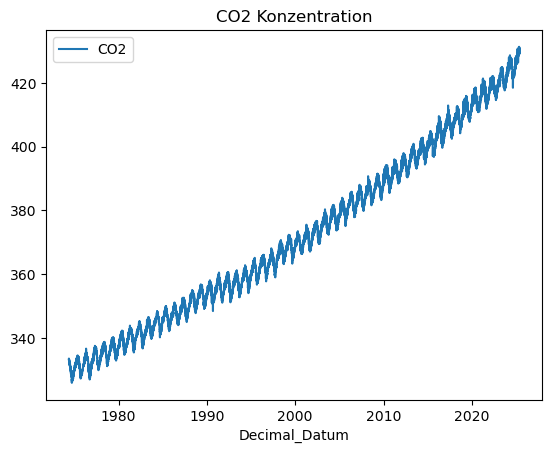

In [42]:
df.plot(x="Decimal_Datum", y="CO2", title="CO2 Konzentration")

<Axes: xlabel='Decimal_Datum'>

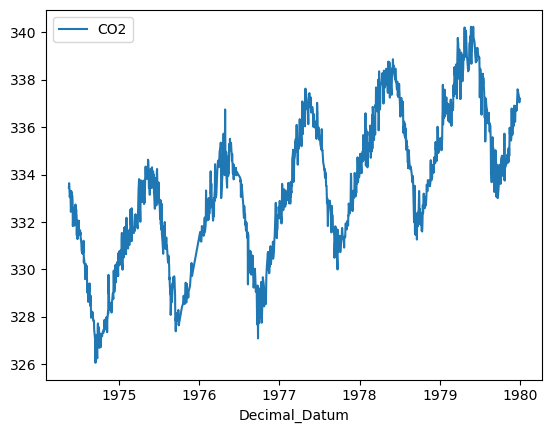

In [49]:
df[df["Decimal_Datum"] < 1980].plot(x="Decimal_Datum", y="CO2")

## Jahresmittelwerte berechnen

Bestimme den Mittelwert eines jeden Jahres:

<Axes: xlabel='Decimal_Datum'>

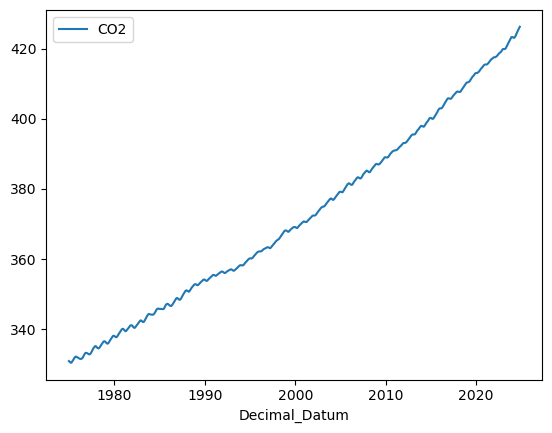

In [64]:
df.rolling(window=365).mean().plot(x="Decimal_Datum", y="CO2")

## Zusatzübung:

Wir können den obigen Graph auch selber mit `matplotlib` erstellen:

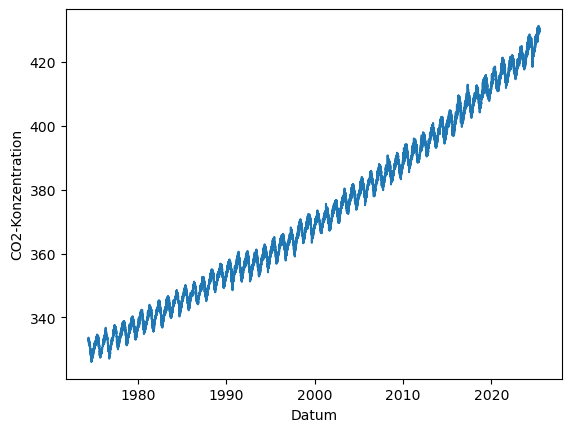

In [45]:
import matplotlib.pyplot as plt

x = df["Decimal_Datum"]
y = df["CO2"]

plt.figure()
plt.plot(x, y)
plt.xlabel("Datum")
plt.ylabel("CO2-Konzentration")
plt.show()